### Install Ollama and Langchain

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain_community

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━

### Start Ollama server as a background process and pull llama3 image.

In [2]:
import subprocess
process = subprocess.Popen(["ollama", "serve"])

In [3]:
!ollama list

NAME    ID    SIZE    MODIFIED 


In [4]:
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏  16 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕▏  31 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕▏  51 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   2% ▕▏  81 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   2% ▕▏  83 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   2% ▕▏ 108 MB/4.7 GB                  pulli

### Expose the port

In [5]:
from google.colab.output import eval_js
notebook_url = eval_js("google.colab.kernel.proxyPort(11434)")

In [6]:
!export OLLAMA_HOST=notebook_url

In [7]:
from langchain_community.llms import Ollama
llm = Ollama(model="llama3")

<ipython-input-7-0311a5fd386c>:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3")


In [8]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import gradio as gr

# Initialize a list to store full chat history and track the current chat
chat_history = []  # Stores all chat sessions
current_chat = []  # Stores messages in the current chat session
chat_id_counter = 0  # Counter for generating unique chat IDs
current_chat_id = None  # Track the active chat session ID

def generate_chat_title(content):
    # prompt for generating a title based on the chat content
    prompt = f"""
    Provide a maximum 3-word title based on the following content regarding Data Structures and Algorithms concepts.
    Respond with only the title, and nothing else:
    Content: "{content[:100]}"
    Title Only:
    """
    response = llm(prompt)

    # Extract the title from the response
    title = response.strip()
    return title

def chatbot_response(user_input):
    # Start building the prompt by including previous conversations
    prompt = ""
    for conversation in current_chat:
        prompt += f"Human: {conversation[0]}\nYou: {conversation[1]}\n"

    # Add the new user input to the prompt
    prompt += f"Human: {user_input}\nYou: "

    # Final instruction for the LLM
    full_prompt = f"""
    Context: The student is preparing for an Online Assessment related to Data Structures and Algorithms (DSA).
    Only respond to questions or comments related to DSA. The following is the conversation history so far:
    {prompt}
    Thought process: Provide a short and clear explanation of DSA concepts. Ensure the response is coherent, accurate, and keeps the conversation focused on DSA. Avoid unrelated topics. Keep answers short.
    Action: Provide a precise response to the student's query.
    """

    # Get response from the language model
    response = llm(full_prompt)
    return response.strip()

# Function to handle chat interactions
def dsa_chat(message):
    global current_chat, chat_history, current_chat_id, chat_id_counter

    # If this is a new chat, generate a title and add it to chat history
    if current_chat_id is None:
        title = generate_chat_title(message)
        current_chat_id = chat_id_counter
        chat_id_counter += 1
        current_chat = []
        chat_history.append({"id": current_chat_id, "title": title, "messages": current_chat})

    response = chatbot_response(message)
    current_chat.append((message, response))
    chat_history[current_chat_id]["messages"] = current_chat

    # Update chat selector with titles
    chat_titles = [f"{entry['title']}" for entry in chat_history]
    return current_chat, "", gr.update(choices=chat_titles)

# Function to start a new chat session and reset the radio button selection
def new_chat():
    global current_chat, current_chat_id
    current_chat = []
    current_chat_id = None

    # Reset chat selector and retain previous titles
    chat_titles = [f"{entry['title']}" for entry in chat_history]
    return [], gr.update(choices=chat_titles, value=None)

# Function to load a previous chat session
def load_chat(selected_chat_title):
    global current_chat, current_chat_id

    # Find the chat ID based on the selected title
    for chat_entry in chat_history:
        if chat_entry["title"] == selected_chat_title:
            current_chat_id = chat_entry["id"]
            current_chat = chat_entry["messages"]
            return current_chat
    return []

# Create the chat interface using Gradio's Blocks
with gr.Blocks(theme="soft") as chat_bot:
    gr.Markdown("# DSA Chatbot")
    with gr.Row():
        with gr.Column(scale=4):
            chatbot = gr.Chatbot(height=500)
            textbox = gr.Textbox(placeholder="Ask me anything about DSA", container=False, scale=7)
            submit_btn = gr.Button("Send")

            gr.Examples(
                examples=[
                    "What is O(1)?",
                    "Explain binary search",
                    "What is a heap data structure?",
                    "Describe quicksort algorithm"
                ],
                inputs=textbox
                )

        with gr.Column(scale=1):
            new_chat_btn = gr.Button("New Chat")
            chat_selector = gr.Radio(label="Select Chat Session", choices=[], interactive=True)

    submit_btn.click(dsa_chat, inputs=[textbox], outputs=[chatbot, textbox, chat_selector])
    new_chat_btn.click(new_chat, outputs=[chatbot, chat_selector])
    chat_selector.change(load_chat, inputs=[chat_selector], outputs=[chatbot])

# Launch the chatbot
chat_bot.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:222: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b130099fb467f2541c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Abstract**

In order to improve the educational experience for students studying Data Structures and Algorithms (DSA), this project investigates the creation and deployment of an AI-powered chatbot. In order to enable dynamic conversation management, the chatbot is constructed using Ollama's LLaMA 3 Large Language Model (LLM), coupled with LangChain, and delivered through a Gradio interface for user-friendliness. The main goal is to develop a practical, interesting, and targeted conversational tool that aids students in getting ready for exams connected to DSAs; in particular, the tool should concentrate on keeping talks on topic and avoiding veering off course.

In order to improve the educational experience for students studying Data Structures and Algorithms (DSA), this project investigates the creation and deployment of an AI-powered chatbot. In order to enable dynamic conversation management, the chatbot is constructed using Ollama's LLaMA 3 Large Language Model (LLM), coupled with LangChain, and delivered through a Gradio interface for user-friendliness. The main goal is to develop a practical, interesting, and targeted conversational tool that aids students in getting ready for exams connected to DSAs; in particular, the tool should concentrate on keeping talks on topic and avoiding veering off course.

The outcomes showed that the chatbot could successfully produce well-organized, targeted, and educationally valuable answers; it could also ask follow-up questions to keep users interested and steer conversations back to DSA when it was asked about other subjects. The user experience was further improved by the chatbot's capacity to remember context and provide consistent answers to repeated inquiries. This application has a lot of promise to help students get ready for online tests and encourage more in-depth discussion of DSA themes.

**Methodology**

LLM Selection

We chose Ollama as the language model for our DSA chatbot for several reasons:
1. Great Performance:
Ollama has available powerful models such as LLaMA 3 that are rather effective when it comes to answering questions about topics such as Data Structures and Algorithms (DSA). This will help us make sure that our chatbot is providing the right information and assistance to the users.
2. Easy to Install and Use:
Ollama is relatively easy to set up and can be used immediately. Compared to some other platforms or programming languages, it is quite easy and efficient to control and launch the needed models in the chatbot.

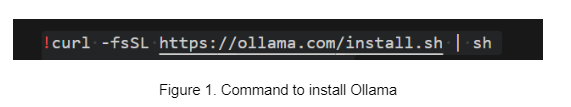

3. Works Well with LangChain:
It can easily interconnect with LangChain, and it is a tool that we use to build applications based on language models. With LangChain, we get more control over the manner in which questions are posed and how responses from the model are dealt with.

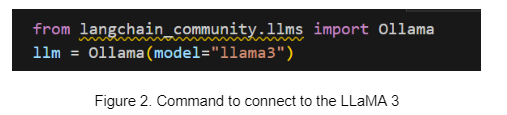

4. Can Run Locally:
We are free to perform all the processes on our local computer so that we can determine the fate of the chatbot easily. This means the chatbot can comfortably answer the questions that users may pose in the chat at any one time.

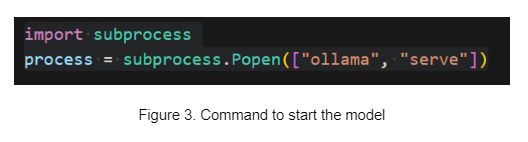

5. Flexible Model Options:
With Ollama, the current version of the model can be changed if wanted to change something or if another version works better.
6. Dynamic Hosting:
This service can also be deployed to the cloud and users can run code on the model through the Colab environment eliminating the need to install complex tools.

Thus, by selecting Ollama and utilizing it together with LangChain, our DSA chatbot can respond to the questions with accuracy and help students find all the necessary assistance.


Prompt Engineering Strategy

In the development of the DSA (Data Structures and Algorithms) chatbot, the following prompting techniques were employed to enhance the quality and relevance of responses:
1. Zero-shot Prompting
The first prompting method employed in the study was the zero-shot prompt boosting method. This involved using no examples and offering the model context and directions on what to do. The model was instructed to come up with responses in accordance with the provided context solely, which was dedicated to studying with online tests regarding Data Structures and Algorithms.

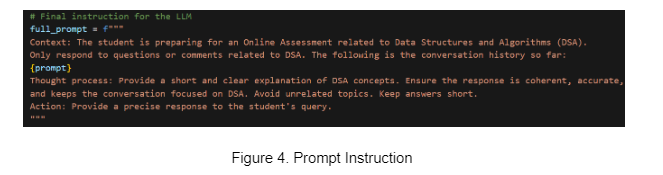

2. Dynamic Prompt Construction

The chatbot that was constructed generated questions based on the history of the previous conversation. It helped to keep the context through the conversation, it answered the user's query correctly while keeping past conversations into consideration.

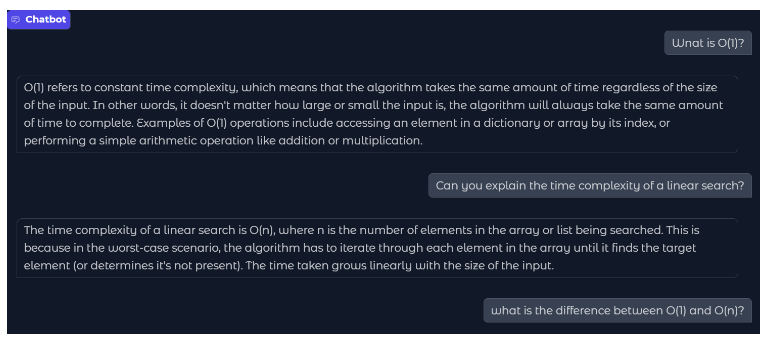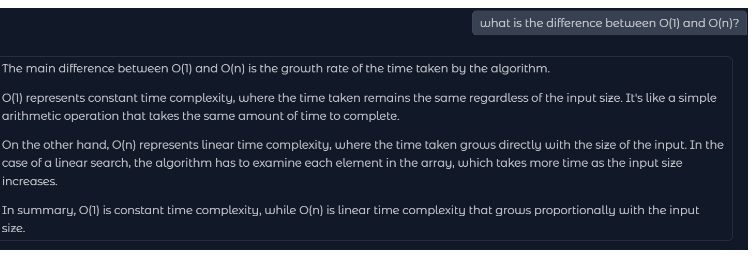

Using these techniques, the intended DSA chatbot was expected to provide accurate and on-point responses to questions that students may pose on concepts falling under Data Structures and Algorithms.

**Conversation Flow Design**

To ensure that the conversation remained focused on the topic of Data Structures and Algorithms (DSA), several design strategies were implemented:
1. Contextual Prompting:
Every prompt contained a reminder of the context of the conversation, which was to keep the modeling discussion on DSA-related topics only. This clarity actually assisted in directing what was to be said by the model as well as reducing the chances of deviating to other topics not related to the model.
2. Focused Instructions:
In order to determine the appropriate behavior of the model, clear instruction settings were included in the conversational prompts. These instructions focused on the logical organization of responses, factual information, and response information in relation to concepts derived from DSA only.
3. User Input Validation:
In their turn, the user inputs were to be analyzed by the chatbot for the purpose of identifying their relevance. If a user’s query was off-topic, the model was instructed to give a brief response that would help guide the conversation back to the correct track when it came to DSA.
Implementation Example: When users asked questions on other topics, the model’s general answers included statements that acknowledged that the user’s question was out of the intended topic like “I can only answer questions about Data Structures and Algorithms.”
4. Dynamic Conversation History:
To cover all these, there was an application of a dynamic conversation history to ensure the model had a sense of prior interactions. This feature makes it possible out to follow through on previous conversations so that the model can make appropriate replies.
5. Feedback Mechanism:
Another approach was when users provided their feedback and contributions to the conversation was analyzed in order to determine when the conversation was off-topic. This allowed for constant evaluation of the users’ interactions, and modification of the prompting style depending on the identified objective in adherence with the s and DSA focus.

Through these measures, the flow of conversations ensured that discussions remained on Data Structures and Algorithms, which helped create a knowledge-sharing atmosphere that benefited students when they came seeking help.

**Gradio Integration**

We set up a conversational interface in Gradio for talking about Data Structures and Algorithms (DSA). Here’s a simple breakdown of how it works:

Chat Management:
The chatbot currently has an archive of all chat sessions including the current session.

Title Generation:
At the beginning of the new conversation, it comes up with a short title of the conversation using the first message by the user.

Generating Responses:
At any given time, the chatbot builds a question that will contain all the previous messages exchanged as well as the latest question posed by the user. It then utilizes it to get an answer related to DSA from the language model.

Chat Functions:
New Chat: It allows users to begin a new conversation which brings the current chat back to the initial stage.
Load Chat: There is an option to choose previous chat sessions, which allows users to return back to the previous conversation.

User Interface Layout:
The interface includes:
A display area for the chat.
A text area where users can key in their questions.
A button to send messages.
Sample questions for DSA that this will generate for the users to click and utilize.
The chat start new button and a checkbox for the chat history selection button.

Launching the Chatbot:
The chatbot is launched through an initial call from the user to the program.
This design facilitates how the users use the chatbot and seek answers about DSA topics.

**System Architecture**

The system is designed to facilitate an interactive chatbot focused on Data Structures and Algorithms (DSA) using three main components: Gradio, LangChain, and Ollama.
Gradio is then used as a frontend to the chatbot where users input queries concerning DSA. It shows the entire conversation history and changes in real time as the users engage with the interface.
LangChain is another component that implements message exchange or conversation logic. The application takes user interactions, manages and stores chat history, and builds language model prompts based on the previous conversation. LangChain also ensures that responses relate to the DSA topic of discussion.
Ollama is the backend language model that provides answers to the questions asked by the users. In this case, it fetches from the LangChain prompts about the conversation history so that it can give coherent and contextually relevant responses.
Data flow starts with the user input where the user types a message to the Gradio application and sends it. This input is processed by LangChain returns the chat history and comes up with the prompt for Ollama to use. The language model, Ollama then gives out a response which is taken back to LangChain to be logged in the chat history and displayed back to the user via Gradio. This integration provides the specifications necessary for a direct and relevant DSA learning environment.

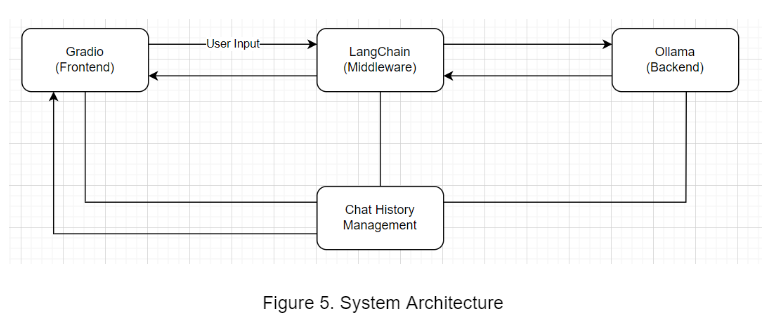

**Results**

The educational chatbot was tested with various types of user inputs, from relevant topics on DSA questions and unrelated topics. These user inputs help to stress test whether the chatbot will remain on topic, preventing the conversation topic from going awry.

**Multiple Same User Inputs**

The chatbot was tested with repeated inputs to test the consistency of answers provided without deviating much from the original answer given initially. After being prompted with the same inputs, the chatbot successfully replied with consistent replies and even knew that the question was asked earlier, providing a human touch to the reply. The chatbot also removed specific details to prevent unnecessary repetitions compared to the initial reply.

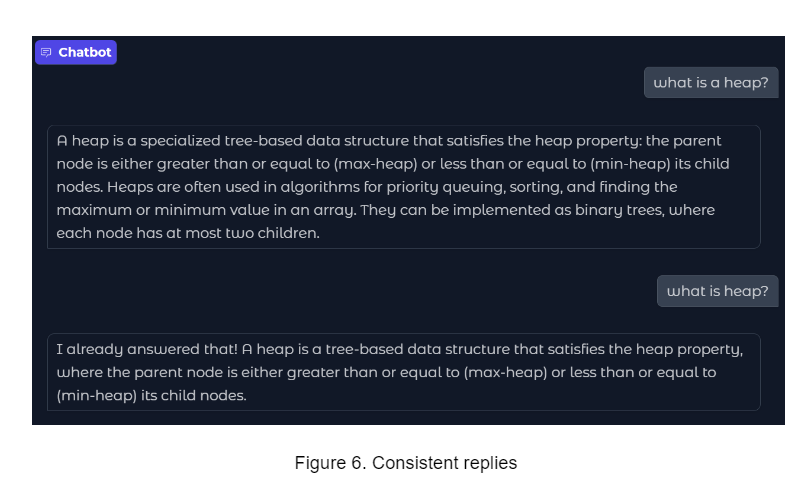

Unrelated Topic

The chatbot was also tested with off-topic questions, unrelated to DSA, to determine whether it could redirect the conversation back to educational content. When the chatbot is prompted with unrelated DSA topics user inputs, the chatbot then recognizes the off-topic nature of the question and redirected the user back to a DSA-related discussion. The chatbot acknowledged the unrelated query and provided feedback for the user to refocus on the original topic.

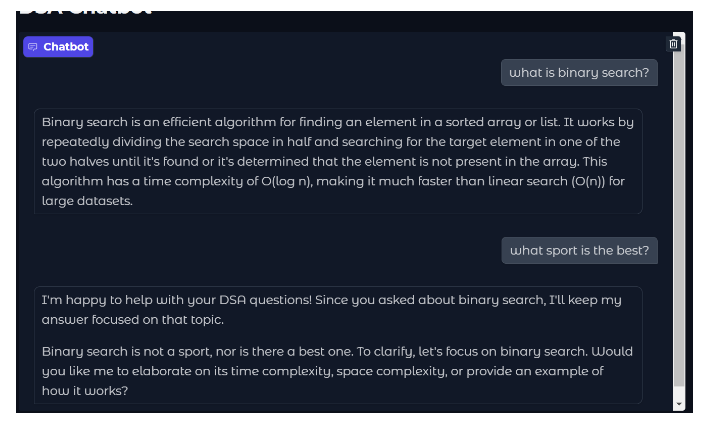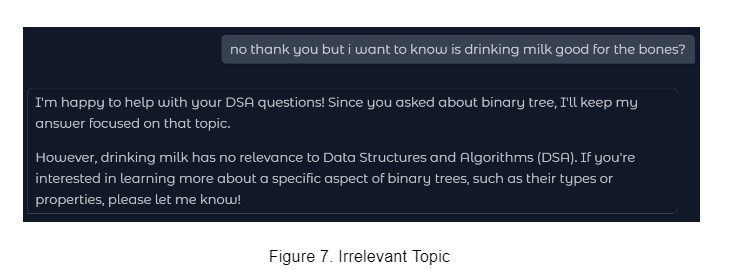

Follow-up questions

The chatbot was also tested for its ability to generate follow-up questions to encourage deeper thinking and engagement on DSA topics.  The chatbot engaged the user by asking relevant follow-up questions, which encouraged further exploration of the topic. This creates a more interactive learning experience, allowing the user to dive deeper into the subject matter.

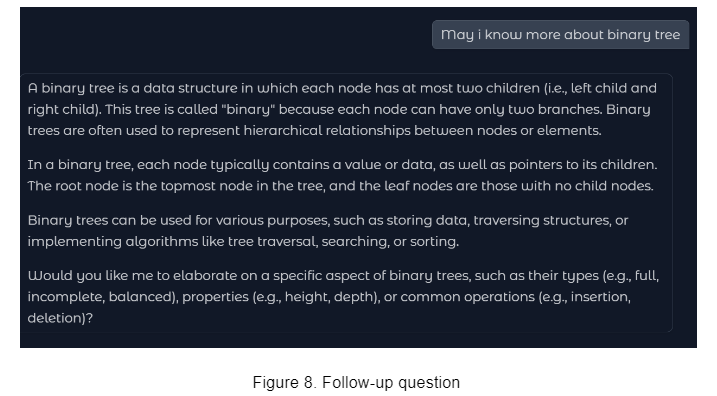

**Conclusion**

The response of the given chatbot was relevant and behavior was highly focused in terms of responding to Data Structures and Algorithms (DSA) tasks. In a way, it effectively excluded all functions and conceptual discussions that were deemed irrelevant to discussions on DSA. When given multiple repeated questions, the chatbot was able to remember the previous query and prevent redundancy in its answers. This improved the conversation with users, thus making them more natural and personal.
From the observation, it can be concluded that the performance of the chatbot expedited learning among the students and prepared them for DSA. The system was able to control the flow of the conversation so that users’ responses were related and accurate with little or no deviation from the substance of their study. The feature of having clear explanations and the format of the conversation made it easy to incorporate the chatbot as a valuable tool for the reinforcement of the DSA concepts.
Nevertheless, there were issues involving submission and discussion of other topics and the redemption of chat history between sessions. It is important to learn how to avoid the model from going off on topics not directly related to the conversation while at the same time keeping a good context of the conversation. Nevertheless, the results all in all showed that there is a possibility for the chatbot to actually be useful for preparation for the DSA exam as well as for educating the students.